In [1]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import sparse
from tqdm import tqdm
import os

os.environ["WANDB_DISABLED"] = "true"

pd.options.display.width = 180
pd.options.display.max_colwidth = 120

BERT_PATH = "./../huggingface-bert-variants/distilbert-base-uncased/distilbert-base-uncased"

data_dir = Path('./AI4Code')

In [2]:
NUM_TRAIN = 120000


def read_notebook(path):
    return (
        pd.read_json(
            path,
            dtype={'cell_type': 'category', 'source': 'str'})
        .assign(id=path.stem)
        .rename_axis('cell_id')
    )


paths_train = list((data_dir / 'train').glob('*.json'))[:NUM_TRAIN]
notebooks_train = [
    read_notebook(path) for path in tqdm(paths_train, desc='Train NBs')
]
df = (
    pd.concat(notebooks_train)
    .set_index('id', append=True)
    .swaplevel()
    .sort_index(level='id', sort_remaining=False)
)

df

Train NBs: 100%|█████████████████████████| 120000/120000 [05:09<00:00, 387.49it/s]


cell_type                                                                                                                   source
id             cell_id                                                                                                                                    
00001756c60be8 1862f0a6      code  # This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
               2a9e43d6      code  import numpy as np\nimport pandas as pd\nimport random\n\nfrom sklearn.model_selection import train_test_split, cros...
               038b763d      code                                                                       import warnings\nwarnings.filterwarnings('ignore')
               2eefe0ef      code                                                                            matplotlib.rcParams.update({'font.size': 14})
               0beab1cd      code  def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):\n    print("Train R2:\...
...                           ...                                                                                                                      ...
fffe1d764579d5 0d770d6b  markdown                                                                                                 ## REMOVING THE OUTLIERS
               d45ddc62  markdown                                                                                                ### DIMENSIONALITY CURSE 
               1a63248d  markdown                                                                                      # BANGALORE HOUSE PRICE PREDICTION 
               a8ffc8b4  markdown       * We have achieved 75.2% accuracy in predicting the prices of the homes in Banglore using Decision Tree Regressor 
               4e2d4c2d  markdown                                                                                                       ## DATA INGESTION 

[5490565 rows x 2 columns]

In [3]:
# Get an example notebook
nb_id = df.index.unique('id')[0]
print('Notebook:', nb_id)

print("The disordered notebook:")
nb = df.loc[nb_id, :]
display(nb)
print()

Notebook: 00001756c60be8
The disordered notebook:


,cell_type,source
cell_id,,
1862f0a6,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
2a9e43d6,code,"import numpy as np\nimport pandas as pd\nimport random\n\nfrom sklearn.model_selection import train_test_split, cros..."
038b763d,code,import warnings\nwarnings.filterwarnings('ignore')
2eefe0ef,code,matplotlib.rcParams.update({'font.size': 14})
0beab1cd,code,"def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):\n print(""Train R2:\..."
9a78ab76,code,TRAIN_DATASET_PATH = '/kaggle/input/real-estate-price-prediction-moscow/train.csv'\nTEST_DATASET_PATH = '/kaggle/inp...
ebe125d5,code,train_df = pd.read_csv(TRAIN_DATASET_PATH)\ntrain_df.tail()
d9dced8b,code,train_df.dtypes
86497fe1,code,num_feat = list(train_df.select_dtypes(exclude='object').columns)\nobj_feat = list(train_df.select_dtypes(include='o...


In [4]:
df_orders = pd.read_csv(
    data_dir / 'train_orders.csv',
    index_col='id',
    squeeze=True,
).str.split()  # Split the string representation of cell_ids into a list

df_orders

id
00001756c60be8    [1862f0a6, 448eb224, 2a9e43d6, 7e2f170a, 038b763d, 77e56113, 2eefe0ef, 1ae087ab, 0beab1cd, 8ffe0b25, 9a78ab76, 0d136...
00015c83e2717b    [2e94bd7a, 3e99dee9, b5e286ea, da4f7550, c417225b, 51e3cd89, 2600b4eb, 75b65993, cf195f8b, 25699d02, 72b3201a, f2c75...
0001bdd4021779    [3fdc37be, 073782ca, 8ea7263c, 80543cd8, 38310c80, 073e27e5, 015d52a4, ad7679ef, 7fde4f04, 07c52510, 0a1a7a39, 0bcd3...
0001daf4c2c76d    [97266564, a898e555, 86605076, 76cc2642, ef279279, df6c939f, 2476da96, 00f87d0a, ae93e8e6, 58aadb1d, d20b0094, 986fd...
0002115f48f982                                 [9ec225f0, 18281c6c, e3b6b115, 4a044c54, 365fe576, a3188e54, b3f6e12d, ee7655ca, 84125b7a]
                                                                           ...                                                           
fffc30d5a0bc46    [09727c0c, ff1ea6a0, ddfef603, a01ce9b3, 3ba953ee, bf92a015, f4a0492a, 095812e6, 53125cfe, aa32a700, 63340e73, 06d8c...
fffc3b44869198    [978a5137, fa

In [5]:
df_orders.loc["00ef4617b2aff0"]

['c3c1c2b9',
 'd2716ea1',
 '6734eda1',
 '285d941e',
 '3bee1bc8',
 '5d2e071a',
 'beb52478',
 '0b950131',
 '96ea0356',
 'b1c3bcf2',
 'aaa8c941',
 'beabe816']

In [6]:
cell_order = df_orders.loc[nb_id]

print("The ordered notebook:")
nb.loc[cell_order, :]

The ordered notebook:


,cell_type,source
cell_id,,
1862f0a6,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
448eb224,markdown,**Импортируем необходимые для работы функции и классы**
2a9e43d6,code,"import numpy as np\nimport pandas as pd\nimport random\n\nfrom sklearn.model_selection import train_test_split, cros..."
7e2f170a,markdown,**Подключаем предупреждения**
038b763d,code,import warnings\nwarnings.filterwarnings('ignore')
77e56113,markdown,"**Устанавливаем значения, чтобы везде был одинаковый шрифт и размер**"
2eefe0ef,code,matplotlib.rcParams.update({'font.size': 14})
1ae087ab,markdown,**Задаем функцию для подсчета метрик**
0beab1cd,code,"def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):\n print(""Train R2:\..."


In [7]:
def get_ranks(base, derived):
    return [base.index(d) for d in derived]

cell_ranks = get_ranks(cell_order, list(nb.index))
nb.insert(0, 'rank', cell_ranks)

nb

,rank,cell_type,source
cell_id,,,
1862f0a6,0,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
2a9e43d6,2,code,"import numpy as np\nimport pandas as pd\nimport random\n\nfrom sklearn.model_selection import train_test_split, cros..."
038b763d,4,code,import warnings\nwarnings.filterwarnings('ignore')
2eefe0ef,6,code,matplotlib.rcParams.update({'font.size': 14})
0beab1cd,8,code,"def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):\n print(""Train R2:\..."
9a78ab76,10,code,TRAIN_DATASET_PATH = '/kaggle/input/real-estate-price-prediction-moscow/train.csv'\nTEST_DATASET_PATH = '/kaggle/inp...
ebe125d5,14,code,train_df = pd.read_csv(TRAIN_DATASET_PATH)\ntrain_df.tail()
d9dced8b,16,code,train_df.dtypes
86497fe1,18,code,num_feat = list(train_df.select_dtypes(exclude='object').columns)\nobj_feat = list(train_df.select_dtypes(include='o...


In [8]:
df_orders_ = df_orders.to_frame().join(
    df.reset_index('cell_id').groupby('id')['cell_id'].apply(list),
    how='right',
)

ranks = {}
for id_, cell_order, cell_id in df_orders_.itertuples():
    ranks[id_] = {'cell_id': cell_id, 'rank': get_ranks(cell_order, cell_id)}

df_ranks = (
    pd.DataFrame
    .from_dict(ranks, orient='index')
    .rename_axis('id')
    .apply(pd.Series.explode)
    .set_index('cell_id', append=True)
)

df_ranks

rank
id             cell_id      
00001756c60be8 1862f0a6    0
               2a9e43d6    2
               038b763d    4
               2eefe0ef    6
               0beab1cd    8
...                      ...
fffe1d764579d5 0d770d6b   43
               d45ddc62   33
               1a63248d    0
               a8ffc8b4   69
               4e2d4c2d    3

[5490565 rows x 1 columns]

In [9]:
df_ancestors = pd.read_csv(data_dir / 'train_ancestors.csv', index_col='id')
df_ancestors

,ancestor_id,parent_id
id,,
00001756c60be8,945aea18,NaN
00015c83e2717b,aa2da37e,317b65d12af9df
0001bdd4021779,a7711fde,NaN
0001daf4c2c76d,090152ca,NaN
0002115f48f982,272b483a,NaN
...,...,...
fffc30d5a0bc46,6aed207b,NaN
fffc3b44869198,a6aaa8d7,NaN
fffc63ff750064,0a1b5b65,NaN


In [10]:
df = df.reset_index().merge(df_ranks, on=["id", "cell_id"]).merge(df_ancestors, on=["id"])
df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id
0,00001756c60be8,1862f0a6,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...,0,945aea18,NaN
1,00001756c60be8,2a9e43d6,code,"import numpy as np\nimport pandas as pd\nimport random\n\nfrom sklearn.model_selection import train_test_split, cros...",2,945aea18,NaN
2,00001756c60be8,038b763d,code,import warnings\nwarnings.filterwarnings('ignore'),4,945aea18,NaN
3,00001756c60be8,2eefe0ef,code,matplotlib.rcParams.update({'font.size': 14}),6,945aea18,NaN
4,00001756c60be8,0beab1cd,code,"def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):\n print(""Train R2:\...",8,945aea18,NaN
...,...,...,...,...,...,...,...
5490560,fffe1d764579d5,0d770d6b,markdown,## REMOVING THE OUTLIERS,43,3c40bfa6,NaN
5490561,fffe1d764579d5,d45ddc62,markdown,### DIMENSIONALITY CURSE,33,3c40bfa6,NaN
5490562,fffe1d764579d5,1a63248d,markdown,# BANGALORE HOUSE PRICE PREDICTION,0,3c40bfa6,NaN
5490563,fffe1d764579d5,a8ffc8b4,markdown,* We have achieved 75.2% accuracy in predicting the prices of the homes in Banglore using Decision Tree Regressor,69,3c40bfa6,NaN


<AxesSubplot:>

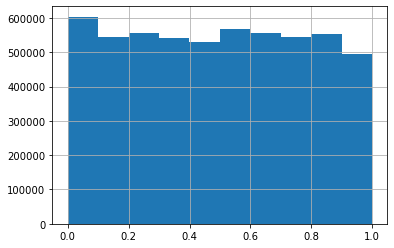

In [11]:
df["pct_rank"] = df["rank"] / df.groupby("id")["cell_id"].transform("count")

df["pct_rank"].hist(bins=10)

In [12]:
dict_cellid_source = dict(zip(df['cell_id'].values, df['source'].values))

In [13]:
import numpy as np
import pandas as pd
import os
import re
# import fasttext
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
from pathlib import Path
import nltk
nltk.download('wordnet')

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()
        #return document

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)
        return preprocessed_text

    
def preprocess_df(df):
    """
    This function is for processing sorce of notebook
    returns preprocessed dataframe
    """
    return [preprocess_text(message) for message in df.source]

df.source = df.source.apply(preprocess_text)

[nltk_data] Downloading package wordnet to /home/yiming/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
from sklearn.model_selection import GroupShuffleSplit

NVALID = 0.1  # size of validation set

splitter = GroupShuffleSplit(n_splits=1, test_size=NVALID, random_state=0)

train_ind, val_ind = next(splitter.split(df, groups=df["ancestor_id"]))

train_df = df.loc[train_ind].reset_index(drop=True)
val_df = df.loc[val_ind].reset_index(drop=True)

In [15]:
from tqdm import tqdm
import sys, os
try:
  from transformers import DistilBertModel, DistilBertTokenizer
except:
  !pip install transformers
  from transformers import DistilBertModel, DistilBertTokenizer
import torch.nn.functional as F
import torch.nn as nn
import torch

import datasets, transformers

from transformers import BertConfig, BertForMaskedLM, DataCollatorForLanguageModeling
from transformers import AutoModelWithLMHead, AutoTokenizer, AutoModel

if not os.path.exists('text.txt'):
  with open('text.txt','w') as f:
    for id, item in tqdm(df.groupby('id')):
      df_markdown =  item[item['cell_type']=='markdown']
      for source, rank in df_markdown[['source', 'rank']].values:
        cell_source = df_markdown[df_markdown['rank']==(rank+1)]
        if len(cell_source):
          setence = source + ' [SEP] ' + cell_source.source.values[0]
          f.write(setence+'\n')
            
if not os.path.exists('train_text.txt'):
  with open('train_text.txt','w') as f:
    for id, item in tqdm(train_df.groupby('id')):
      df_markdown =  item[item['cell_type']=='markdown']
      for source, rank in df_markdown[['source', 'rank']].values:
        cell_source = df_markdown[df_markdown['rank']==(rank+1)]
        if len(cell_source):
          setence = source + ' [SEP] ' + cell_source.source.values[0]
          f.write(setence+'\n')
            
if not os.path.exists('val_text.txt'):
  with open('val_text.txt','w') as f:
    for id, item in tqdm(val_df.groupby('id')):
      df_markdown =  item[item['cell_type']=='markdown']
      for source, rank in df_markdown[['source', 'rank']].values:
        cell_source = df_markdown[df_markdown['rank']==(rank+1)]
        if len(cell_source):
          setence = source + ' [SEP] ' + cell_source.source.values[0]
          f.write(setence+'\n')
      

# Train a tokenizer
import tokenizers
from transformers import BertTokenizer, LineByLineTextDataset

pretmodel = 'prajjwal1/bert-medium'
tokenizer = AutoTokenizer.from_pretrained(pretmodel)

/home/yiming/anaconda3/envs/kaggle/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████████████████████████████████| 12005/12005 [00:39<00:00, 300.32it/s]


In [ ]:
model = AutoModelWithLMHead.from_pretrained(pretmodel)

outdir = 'pretrain_' + pretmodel.split('/')[1]

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

from transformers import Trainer, TrainingArguments

dataset= LineByLineTextDataset(
    tokenizer = tokenizer,
    file_path = './text.txt',
    block_size = 128  # maximum sequence length
)

print('No. of lines: ', len(dataset)) # No of lines in your datset

training_args = TrainingArguments(
    output_dir='./',
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_device_train_batch_size=64,
    save_steps=10000,
)
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)
trainer.train()
trainer.save_model(outdir)

/home/yiming/anaconda3/envs/kaggle/lib/python3.7/site-packages/transformers/models/auto/modeling_auto.py:911: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,
Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a Bert

# Hyperparameter search

The `Trainer` supports hyperparameter search using [optuna](https://optuna.org/) or [Ray Tune](https://docs.ray.io/en/latest/tune/). For this last section you will need either of those libraries installed, just uncomment the line you want on the next cell and run it.

In [ ]:
! pip install optuna
! pip install ray[tune]

During hyperparameter search, the `Trainer` will run several trainings, so it needs to have the model defined via a function (so it can be reinitialized at each new run) instead of just having it passed. We jsut use the same function as before:

In [ ]:
def model_init():
    return AutoModelWithLMHead.from_pretrained(pretmodel)

And we can instantiate our Trainer like before:

In [ ]:
train_dataset= LineByLineTextDataset(
    tokenizer = tokenizer,
    file_path = './train_text.txt',
    block_size = 128  # maximum sequence length
)
val_dataset= LineByLineTextDataset(
    tokenizer = tokenizer,
    file_path = './val_text.txt',
    block_size = 128  # maximum sequence length
)

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

In [ ]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")

The `hyperparameter_search` method returns a `BestRun` objects, which contains the value of the objective maximized (by default the sum of all metrics) and the hyperparameters it used for that run.

In [ ]:
best_run

You can customize the objective to maximize by passing along a `compute_objective` function to the `hyperparameter_search` method, and you can customize the search space by passing a `hp_space` argument to `hyperparameter_search`. See this [forum post](https://discuss.huggingface.co/t/using-hyperparameter-search-in-trainer/785/10) for some examples.

To reproduce the best training, just set the hyperparameters in your `TrainingArgument` before creating a `Trainer`:

In [ ]:
for n, v in best_run.hyperparameters.items():
    setattr(trainer.args, n, v)

trainer.train()

In [ ]:
trainer.save_model(outdir)